# IMPORT PYTHON LIBRARIES-I
#### pandas - data analysis and associated manipulation of tabular data in DataFrames
numpy - numerical python - adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [52]:
import pandas as pd
import numpy as np
data=pd.read_csv("iris (2).csv")

In [53]:
data.head()
data.shape

(150, 6)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
data.shape

(150, 6)

In [56]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
data.drop('Id',axis=1,inplace=True)

In [58]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
data.Species.unique()
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

data=data.sample(frac=1)
data.head()

# To check for the outliers

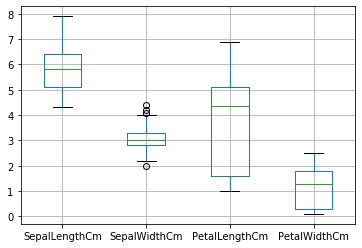

In [62]:
data.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

# we can see that there are outliers presnt in sepalwidth


Treatement of outliers

In [63]:
data.SepalWidthCm.quantile([0.25,0.5,0.75])

0.25    2.8
0.50    3.0
0.75    3.3
Name: SepalWidthCm, dtype: float64

In [64]:
IQR=3.3-2.8
Max=3.3+1.5*IQR
Min=2.8-1.5*IQR
print(IQR,Min,Max)

0.5 2.05 4.05


In [67]:
data.loc[data['SepalWidthCm']>4.05,'SepalLengthCm']=4.05
data.loc[data['SepalWidthCm']<2.05, 'SepalLengthCm']=2.05

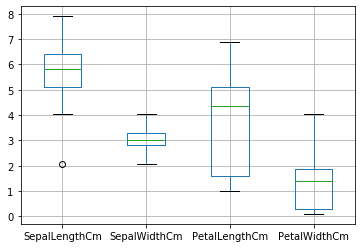

In [42]:
data.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [68]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data[['Species']]

In [69]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.3,2.5,5.0,1.9
107,7.3,2.9,6.3,1.8
78,6.0,2.9,4.5,1.5
43,5.0,3.5,1.6,0.6
135,7.7,3.0,6.1,2.3
...,...,...,...,...
57,4.9,2.4,3.3,1.0
48,5.3,3.7,1.5,0.2
141,6.9,3.1,5.1,2.3
79,5.7,2.6,3.5,1.0


# IMPORTING PYTHON LIBRARIES-II


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

# MODEL BUILDING


In [73]:
ds=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1)
model=ds.fit(x_train,y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
dep=tree.export_text(ds)

In [76]:
print(dep)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- feature_1 <= 2.75
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  2.75
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



# Predictions

In [78]:
y_pred=ds.predict(x_test)
print("The accuracy score is:",accuracy_score(y_test,y_pred))

The accuracy score is: 0.95


In [79]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[22  0  0]
 [ 0 21  1]
 [ 0  2 14]]


# Testing the accuracy of the model

##test data:6.3	2.5	5.0	1.9	Iris-virginica

In [81]:
ds.predict([[6.3,2.5,5.0,1.9]])

array(['Iris-virginica'], dtype=object)